In [14]:
# Importing Standard Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re
from random import randint
%matplotlib inline

In [15]:
# Importing train, test and sample_sub
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [16]:
alldata = pd.concat([train,test])

In [17]:
alldata.columns

Index([u'Energy', u'Observation', u'Press_mm_hg', u'RH_1', u'RH_2', u'RH_3',
       u'RH_4', u'RH_5', u'RH_6', u'RH_7', u'RH_8', u'RH_9', u'RH_out', u'T1',
       u'T2', u'T3', u'T4', u'T5', u'T6', u'T7', u'T8', u'T9', u'T_out',
       u'Tdewpoint', u'Visibility', u'Windspeed'],
      dtype='object')

In [18]:
rename_dict = {'Observation': 'ID',
 'Pressure': 'Outside pressure',
 'RH_1': 'Humid in kitchen area',
 'RH_2': 'Humid in living',
 'RH_3': 'Humid in laundry',
 'RH_4': 'Humid in office',
 'RH_5': 'Humidin bath',
 'RH_6': 'Humid outside the building (north side)',
 'RH_7': 'Humid in ironing',
 'RH_8': 'Humid in teenager room',
 'RH_9': 'Humid in parents',
 'RH_out': 'Humid outside',
 'T1': 'Temp in kitchen',
 'T2': 'Temp in living room',
 'T3': 'Temp in laundry',
 'T4': 'Temp in office',
 'T5': 'Temp in bath',
 'T6': 'Temp outside the building (north side)',
 'T7': 'Temp in ironing',
 'T8': 'Temp in teenager',
 'T9': 'Temp in parents',
 'T_out': 'Temp outside'}

In [19]:
alldata = alldata.rename(columns=rename_dict)

In [20]:
# Inspect alldata set
print "Length of alldata rows:", len(alldata)
inspect_alldata = pd.DataFrame({'Dtype': alldata.dtypes, 'Unique values': alldata.nunique() ,
             'Number of Missing values': alldata.isnull().sum() ,
              'Percentage Missing': (alldata.isnull().sum() / len(alldata)) * 100
             }).sort_values(by='Number of Missing values',ascending = False)
inspect_alldata

Length of alldata rows: 19725


,Dtype,Number of Missing values,Percentage Missing,Unique values
Energy,float64,3945,20.0,82
ID,int64,0,0.0,19725
Visibility,float64,0,0.0,412
Tdewpoint,float64,0,0.0,1118
Temp outside,float64,0,0.0,1055
Temp in parents,float64,0,0.0,924
Temp in teenager,float64,0,0.0,2228
Temp in ironing,float64,0,0.0,1954
Temp outside the building (north side),float64,0,0.0,4445
Temp in bath,float64,0,0.0,2263


In [21]:
alldata.head()

,Energy,ID,Press_mm_hg,Humid in kitchen area,Humid in living,Humid in laundry,Humid in office,Humidin bath,Humid outside the building (north side),Humid in ironing,...,Temp in office,Temp in bath,Temp outside the building (north side),Temp in ironing,Temp in teenager,Temp in parents,Temp outside,Tdewpoint,Visibility,Windspeed
0,70.0,1111,760.050000,37.200,38.000000,37.290000,34.942857,42.826667,9.633333,35.754000,...,22.832857,20.500000,12.533333,22.060,22.700000,20.20,12.80,5.65,28.0,3.5
1,210.0,1112,764.166667,41.045,39.133333,39.526667,34.126667,44.663333,11.926667,25.133333,...,21.700000,18.633333,10.190000,20.790,22.926667,19.73,8.47,-1.92,26.5,8.0
2,50.0,1113,757.600000,38.000,35.700000,36.590000,35.530000,46.200000,21.533333,33.663333,...,22.000000,19.000000,10.360000,19.600,21.890000,19.79,10.60,2.40,27.0,2.0
3,50.0,1114,760.600000,38.530,38.000000,36.200000,35.090000,43.625714,9.590000,32.790000,...,23.100000,22.042857,10.390000,23.390,24.890000,22.60,11.60,4.67,40.0,1.0
4,250.0,1115,756.983333,42.560,34.356000,40.333333,40.900000,49.090000,1.000000,38.208750,...,24.500000,21.500000,20.290000,23.365,23.390000,22.60,17.70,10.40,21.5,1.0


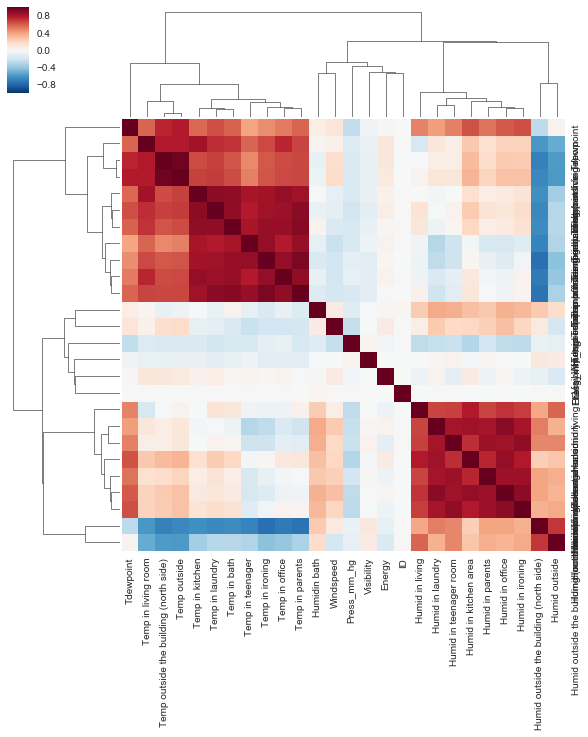

In [22]:
sns.clustermap(alldata.corr(),figsize=(10,10))

In [23]:
alldata.columns

Index([u'Energy', u'ID', u'Press_mm_hg', u'Humid in kitchen area',
       u'Humid in living', u'Humid in laundry', u'Humid in office',
       u'Humidin bath', u'Humid outside the building (north side)',
       u'Humid in ironing', u'Humid in teenager room', u'Humid in parents',
       u'Humid outside', u'Temp in kitchen', u'Temp in living room',
       u'Temp in laundry', u'Temp in office', u'Temp in bath',
       u'Temp outside the building (north side)', u'Temp in ironing',
       u'Temp in teenager', u'Temp in parents', u'Temp outside', u'Tdewpoint',
       u'Visibility', u'Windspeed'],
      dtype='object')

In [24]:
Humidity_cols = [c for c in alldata.columns if c.startswith("Humid")]
Temp_cols = [c for c in alldata.columns if c.startswith("Temp")]

In [25]:
Temp_cols

['Temp in kitchen',
 'Temp in living room',
 'Temp in laundry',
 'Temp in office',
 'Temp in bath',
 'Temp outside the building (north side)',
 'Temp in ironing',
 'Temp in teenager',
 'Temp in parents',
 'Temp outside']

In [27]:
Humidity_cols

['Humid in kitchen area',
 'Humid in living',
 'Humid in laundry',
 'Humid in office',
 'Humidin bath',
 'Humid outside the building (north side)',
 'Humid in ironing',
 'Humid in teenager room',
 'Humid in parents',
 'Humid outside']

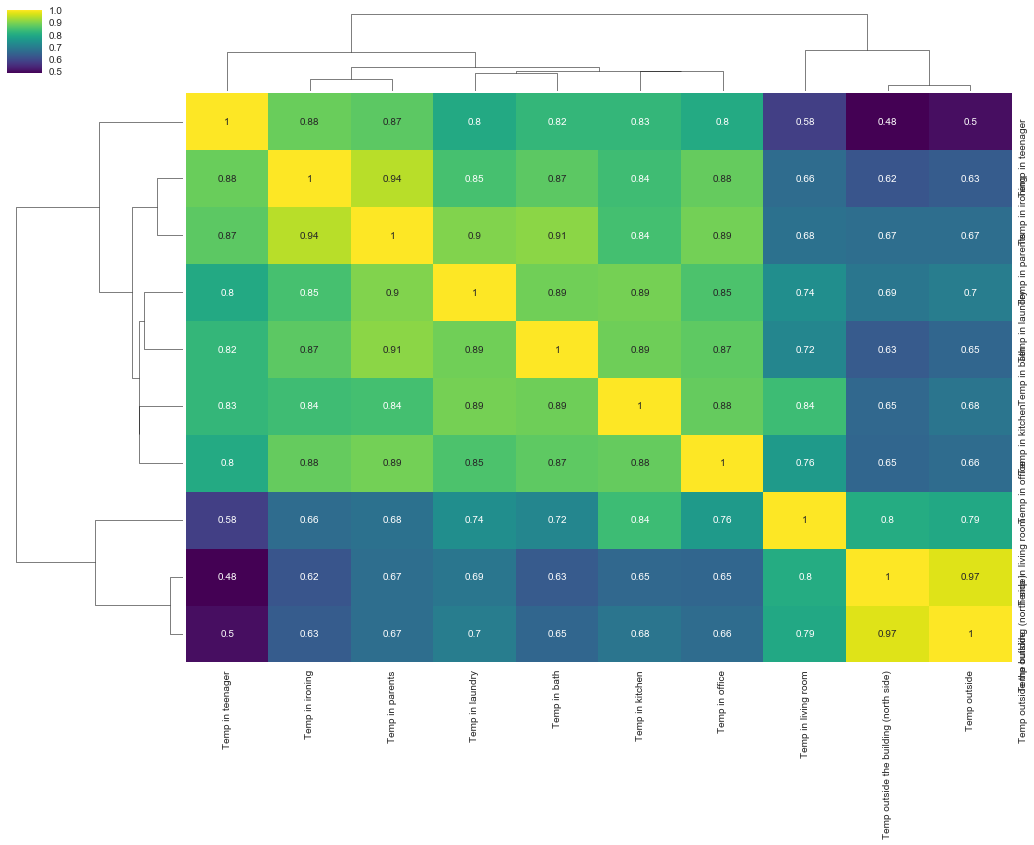

In [28]:
sns.clustermap(alldata[Temp_cols].corr(), cmap='viridis', annot= True,figsize=(18,12))

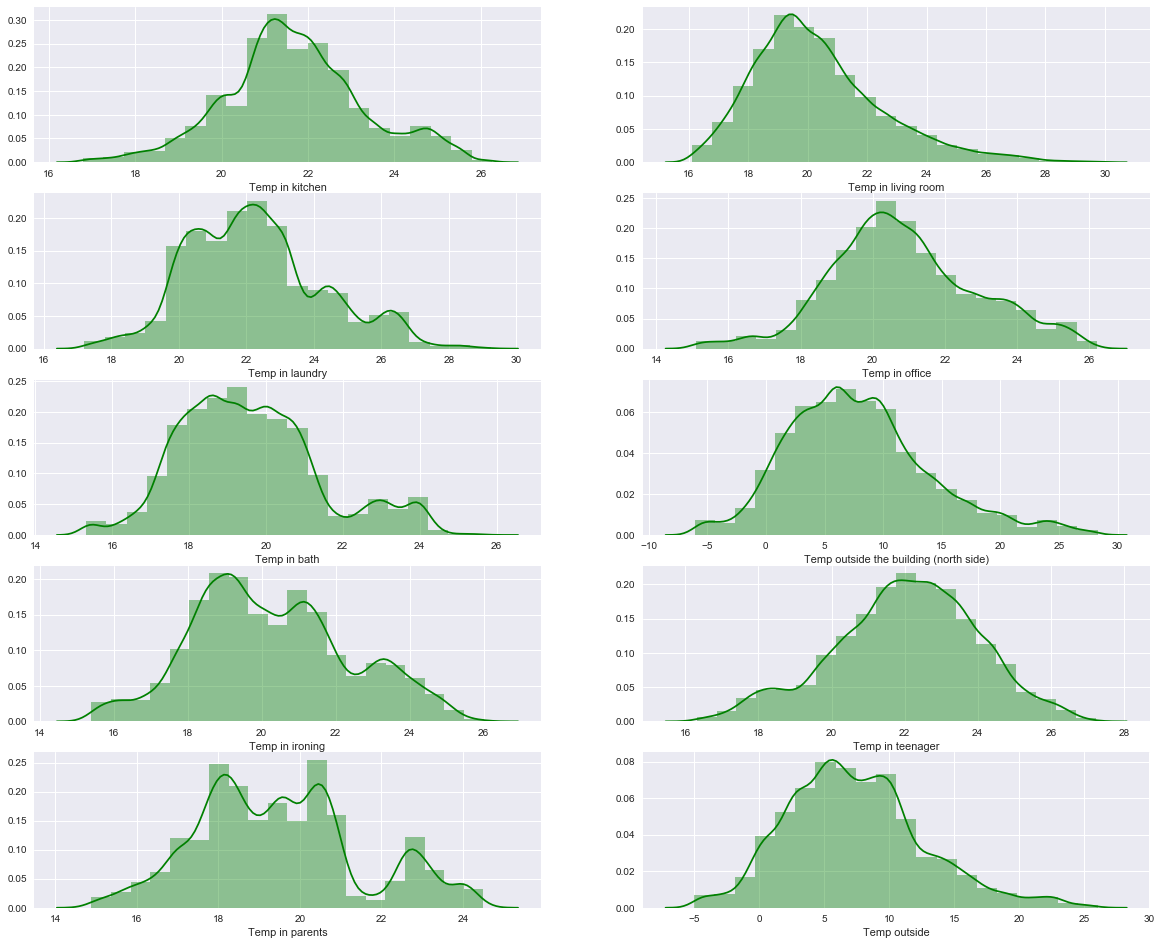

In [29]:
plt.figure(figsize=(20,20))
for i, c in enumerate(Temp_cols):
    ax = plt.subplot(6,2,i+1)
    sns.distplot(alldata[c], color='g', bins=20)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
#  Where subplot numbers of multiple of len(categorical_feat)

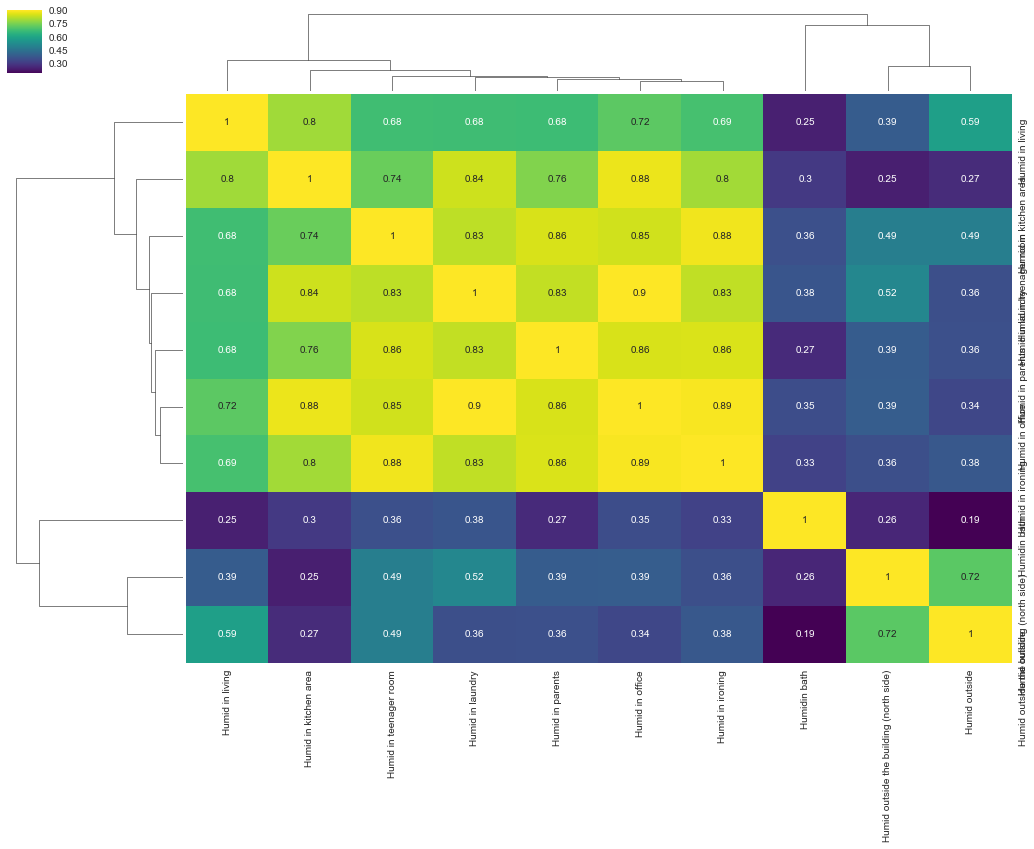

In [30]:
plt.figure(figsize=(18,12))
sns.clustermap(alldata[Humidity_cols].corr(), cmap='viridis',annot=True,figsize=(18,12), vmax=.9)

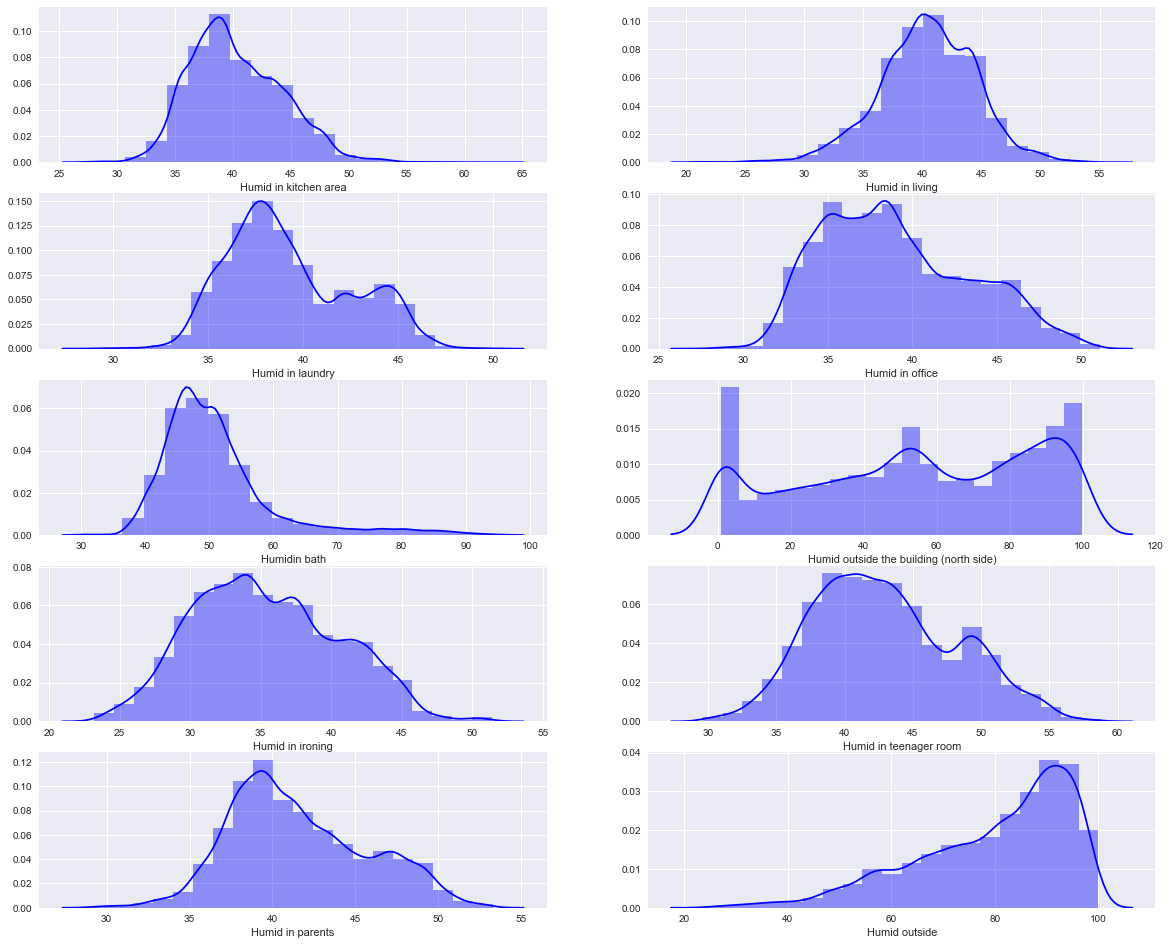

In [31]:
plt.figure(figsize=(20,20))
for i, c in enumerate(Humidity_cols):
    ax = plt.subplot(6,2,i+1)
    sns.distplot(alldata[c], color='b', bins=20)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
#  Where subplot numbers of multiple of len(categorical_feat)

In [32]:
alldata.head(10)

,Energy,ID,Press_mm_hg,Humid in kitchen area,Humid in living,Humid in laundry,Humid in office,Humidin bath,Humid outside the building (north side),Humid in ironing,...,Temp in office,Temp in bath,Temp outside the building (north side),Temp in ironing,Temp in teenager,Temp in parents,Temp outside,Tdewpoint,Visibility,Windspeed
0,70.0,1111,760.050000,37.200000,38.000000,37.290000,34.942857,42.826667,9.633333,35.754000,...,22.832857,20.500000,12.533333,22.060,22.700000,20.200000,12.80,5.65,28.0,3.500000
1,210.0,1112,764.166667,41.045000,39.133333,39.526667,34.126667,44.663333,11.926667,25.133333,...,21.700000,18.633333,10.190000,20.790,22.926667,19.730000,8.47,-1.92,26.5,8.000000
2,50.0,1113,757.600000,38.000000,35.700000,36.590000,35.530000,46.200000,21.533333,33.663333,...,22.000000,19.000000,10.360000,19.600,21.890000,19.790000,10.60,2.40,27.0,2.000000
3,50.0,1114,760.600000,38.530000,38.000000,36.200000,35.090000,43.625714,9.590000,32.790000,...,23.100000,22.042857,10.390000,23.390,24.890000,22.600000,11.60,4.67,40.0,1.000000
4,250.0,1115,756.983333,42.560000,34.356000,40.333333,40.900000,49.090000,1.000000,38.208750,...,24.500000,21.500000,20.290000,23.365,23.390000,22.600000,17.70,10.40,21.5,1.000000
5,180.0,1116,749.400000,43.363333,42.433333,42.500000,41.663333,55.360000,93.066667,40.060000,...,18.600000,17.200000,3.100000,17.700,18.500000,16.700000,1.70,1.25,32.5,3.833333
6,100.0,1117,756.300000,36.060000,34.634000,33.590000,34.700000,80.110000,1.000000,29.792500,...,24.890000,24.465714,12.233333,24.290,25.356667,23.405714,9.43,2.40,40.0,5.000000
7,60.0,1118,765.950000,34.863333,35.223333,36.090000,33.933333,53.260000,10.600000,31.496000,...,22.633333,21.390000,5.660000,21.500,24.100000,20.318571,8.00,2.33,40.0,1.000000
8,50.0,1119,760.600000,35.000000,31.856667,35.290000,33.200000,38.363333,1.000000,28.500000,...,23.000000,20.856667,21.290000,22.790,21.666667,20.290000,18.60,4.05,40.0,4.500000
9,100.0,1120,748.833333,37.200000,40.656667,37.260000,34.463333,78.800000,48.400000,31.290000,...,21.600000,20.093333,3.730000,18.000,21.000000,17.290000,4.67,0.20,40.0,3.666667


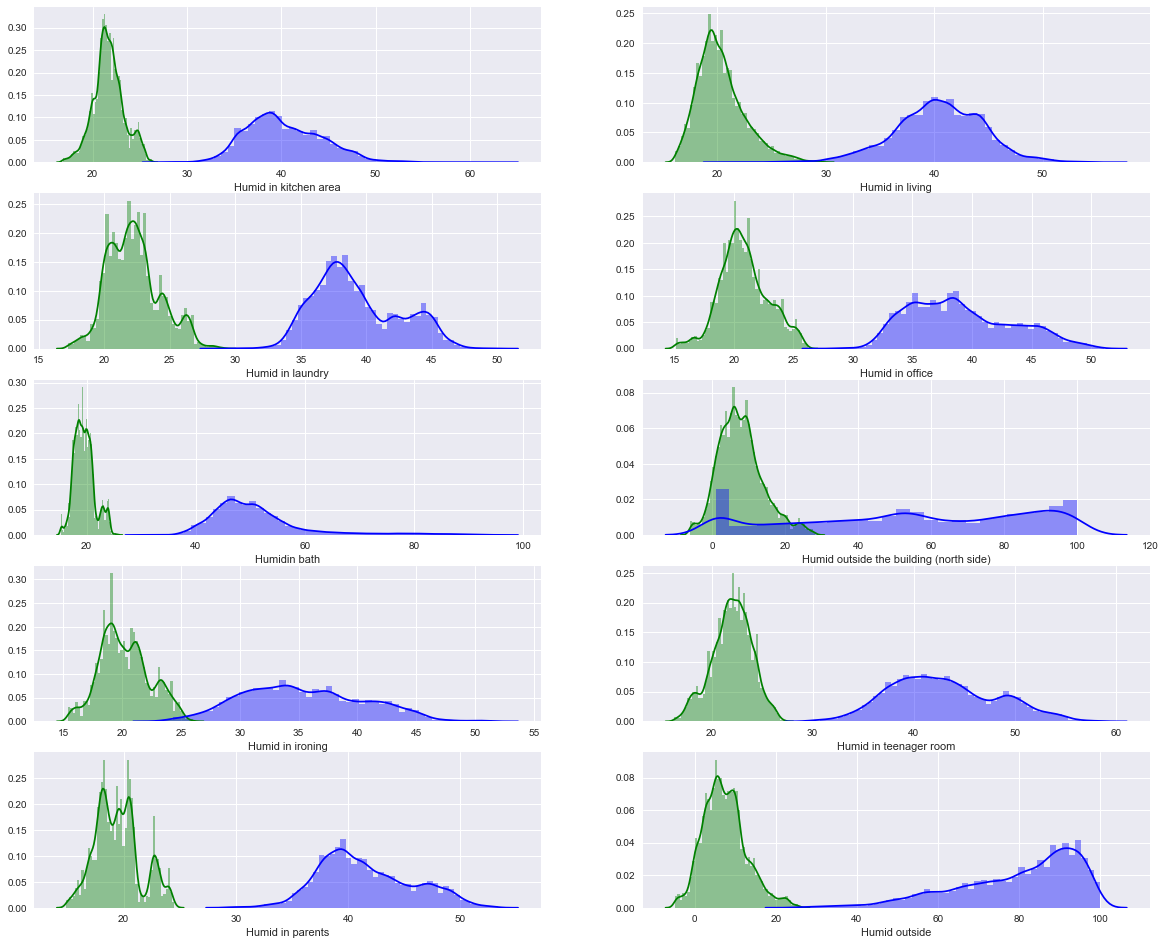

In [33]:
plt.figure(figsize=(20,20))
for i, c in enumerate(Temp_cols):
    ax = plt.subplot(6,2,i+1)
    sns.distplot(alldata[c], color='g')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
#  Where subplot numbers of multiple of len(categorical_feat)
for i, c in enumerate(Humidity_cols):
    ax = plt.subplot(6,2,i+1)
    sns.distplot(alldata[c], color='b')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
#  Where subplot numbers of multiple of len(categorical_feat)

## Is it Supersaturated? 

In [34]:
alldata[ alldata['Humid outside'] == 100].shape

(69, 26)

In [35]:
alldata[Humidity_cols].describe()

,Humid in kitchen area,Humid in living,Humid in laundry,Humid in office,Humidin bath,Humid outside the building (north side),Humid in ironing,Humid in teenager room,Humid in parents,Humid outside
count,19725.000000,19725.000000,19725.000000,19725.000000,19725.000000,19725.000000,19725.000000,19725.000000,19725.000000,19725.000000
mean,40.260559,40.422081,39.243014,39.027640,50.952021,54.606832,35.389465,42.937484,41.553517,79.751584
std,3.979459,4.069757,3.254868,4.341706,9.022723,31.147868,5.114485,5.224940,4.151819,14.902820
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.026667,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375556,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.163333,53.672222,83.200000,39.000000,46.537778,44.345000,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000
